# Table of Contents
 <p><div class="lev1 toc-item"><a href="#Chapter-3" data-toc-modified-id="Chapter-3-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Chapter 3</a></div><div class="lev2 toc-item"><a href="#Ex-1" data-toc-modified-id="Ex-1-11"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Ex 1</a></div><div class="lev2 toc-item"><a href="#Ex-2" data-toc-modified-id="Ex-2-12"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Ex 2</a></div><div class="lev3 toc-item"><a href="#Part-I" data-toc-modified-id="Part-I-121"><span class="toc-item-num">1.2.1&nbsp;&nbsp;</span>Part I</a></div><div class="lev4 toc-item"><a href="#Ans" data-toc-modified-id="Ans-1211"><span class="toc-item-num">1.2.1.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev3 toc-item"><a href="#Part-II" data-toc-modified-id="Part-II-122"><span class="toc-item-num">1.2.2&nbsp;&nbsp;</span>Part II</a></div><div class="lev4 toc-item"><a href="#Ans" data-toc-modified-id="Ans-1221"><span class="toc-item-num">1.2.2.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#Ex-3" data-toc-modified-id="Ex-3-13"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Ex 3</a></div><div class="lev3 toc-item"><a href="#Part-I" data-toc-modified-id="Part-I-131"><span class="toc-item-num">1.3.1&nbsp;&nbsp;</span>Part I</a></div><div class="lev4 toc-item"><a href="#Ans" data-toc-modified-id="Ans-1311"><span class="toc-item-num">1.3.1.1&nbsp;&nbsp;</span>Ans</a></div><div class="lev2 toc-item"><a href="#Ex-6" data-toc-modified-id="Ex-6-14"><span class="toc-item-num">1.4&nbsp;&nbsp;</span>Ex 6</a></div><div class="lev2 toc-item"><a href="#Ex-8" data-toc-modified-id="Ex-8-15"><span class="toc-item-num">1.5&nbsp;&nbsp;</span>Ex 8</a></div><div class="lev3 toc-item"><a href="#Part-I" data-toc-modified-id="Part-I-151"><span class="toc-item-num">1.5.1&nbsp;&nbsp;</span>Part I</a></div><div class="lev3 toc-item"><a href="#Part-II" data-toc-modified-id="Part-II-152"><span class="toc-item-num">1.5.2&nbsp;&nbsp;</span>Part II</a></div>

# Chapter 3

## Ex 1

(Party Animal). The party animal problem corresponds to the network in fig(3.14). The boss is angry and the worker has a headache – what is the probability the worker has been to a party? To complete the specifications, the probabilities are given as follows:

| ------------------------------------ | ------------------------------------ | ------------------------------------ |
|-|-|-|
| $p(U=tr|P=tr,D=tr)=0.999$ | $p(U=tr|P=fa,D=tr)=0.9$ | $p(H=tr|P=tr)=0.9$ |
| $p(U = tr|P = tr, D = fa) = 0.9$ | $p(U = tr|P = fa, D = fa) = 0.01$ | $p(H = tr|P = fa) = 0.2$ |
| $p(A=tr|U =tr)=0.95$ | $p(A=tr|U =fa)=0.5$ |  $p(P =tr)=0.2, p(D=tr)=0.4$ |


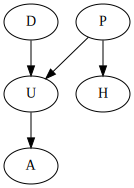

In [1]:
from graphviz import Digraph
dag = Digraph()
dag.edge('P', 'U')
dag.edge('P', 'H')
dag.edge('U', 'A')
dag.edge('D', 'U')
dag

$$
\begin{equation}
\begin{aligned}
P(P=1 \mid H=1, A=1)
&= \sum_u \sum_d P(P=1, U=u, D=d \mid H=1, A=1) \\
&= \sum_u \sum_d \frac{P(H=1, A=1 \mid P=1, U=u, D=d) \cdot P(P=1, U=u, D=d)}{P(H=1, A=1)} \\
&= \sum_u \sum_d \frac{P(H=1 \mid P=1, U=u, D=d) \cdot P(A=1 \mid P=1, U=u, D=d) \cdot P(P=1, U=u, D=d)}{P(H=1, A=1)} & \text{Once we know the parents of $H$ and $A$, they are independent from each other.}\\
&= \sum_u \sum_d \frac{P(H=1 \mid P=1) \cdot P(A=1 \mid U=u) \cdot P(P=1, U=u, D=d)}{P(H=1, A=1)} & \text{Once we know the parents of $H$ and $A$, they are independent of the d-separated from the other vars.}\\
&= \sum_u \sum_d \frac{P(H=1 \mid P=1) \cdot P(A=1 \mid U=u) \cdot P(U=u \mid P=1, D=d) \cdot P(P=1) \cdot P(D=d)}{P(H=1, A=1)} \\
&=\frac{ \sum_u \sum_d P(H=1 \mid P=1) \cdot P(A=1 \mid U=u) \cdot P(U=u \mid P=1, D=d) \cdot P(P=1) \cdot P(D=d)}{\sum_p \sum_u \sum_d P(H=1 \mid P=p) \cdot P(A=1 \mid U=u) \cdot P(U=u \mid P=p, D=d) \cdot P(P=p) \cdot P(D=d)} \\
&=\frac{ P(P=1) \cdot P(H=1 \mid P=1) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=1, D=d) \cdot P(D=d)}{ \sum_p P(P=p) \cdot P(H=1 \mid P=p) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=p, D=d) \cdot P(D=d)} \\
\end{aligned}
\end{equation}
$$

Numerator:
$$
\begin{equation}
\begin{aligned}
 P(P=1) \cdot P(H=1 \mid P=1) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=1, D=d) \cdot P(D=d)
 &= 0.2 \cdot 0.9 \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=1, D=d) \cdot P(D=d) \\
 &= 0.2 \cdot 0.9 \cdot  \\
 &\qquad [P(A=1 \mid U=0) \cdot (P(U=0 \mid P=1, D=0) \cdot P(D=0)  \\
 &\qquad + P(U=0 \mid P=1, D=1) \cdot P(D=1))  \\
 &\qquad + P(A=1 \mid U=1) \cdot (P(U=1 \mid P=1, D=0) \cdot P(D=0)  \\
 &\qquad + P(U=1 \mid P=1, D=1) \cdot P(D=1))] \\
&= 0.2 \cdot 0.9 \cdot 0.5 \cdot (0.1 \cdot 0.6 + 0.001 \cdot 0.4) + 0.95 \cdot (0.9 \cdot 0.6 + 0.999 \cdot 0.4) \\
&\approx 0.898056
\end{aligned}
\end{equation}
$$

Denominator:
$$
\begin{equation}
\begin{aligned}
 \sum_p P(P=p) \cdot P(H=1 \mid P=p) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=p, D=d) \cdot P(D=d)
&= 0.898056 + P(P=0) \cdot P(H=1 \mid P=0) \cdot \sum_u P(A=1 \mid U=u) \cdot \sum_d P(U=u \mid P=0, D=d) \cdot P(D=d)  \\
&= 0.898056 + 0.8 \cdot 0.2 \cdot P(A=1 \mid U=0) \cdot \sum_d P(U=0 \mid P=0, D=d) \cdot P(D=d) \\
&\qquad + P(A=1 \mid U=1) \cdot \sum_d P(U=1 \mid P=0, D=d) \cdot P(D=d) \\
&= 0.898056 + 0.8 \cdot 0.2 \cdot P(A=1 \mid U=0) \cdot [P(U=0 \mid P=0, D=0) \cdot P(D=0) + P(U=0 \mid P=0, D=1) \cdot P(D=1)] \\
&\qquad + P(A=1 \mid U=1) \cdot [P(U=1 \mid P=0, D=0) \cdot P(D=0) + P(U=1 \mid P=0, D=1) \cdot P(D=1)] \\
&= 0.898056 + 0.8 \cdot 0.2 \cdot 0.5 \cdot (0.99 \cdot 0.6 + 0.1 \cdot 0.4) + 0.95 \cdot (0.01 \cdot 0.6 + 0.9 \cdot 0.4) \\
&= 2.194532
\end{aligned}
\end{equation}
$$

Thus, $P(P=1 \mid H=1, A=1) = \frac{0.898056}{2.194532} \approx 41\%.$ 





In [3]:
numerator = 0.2*0.9*0.5*(0.1*0.6+0.001*0.4)+0.95*(0.9*0.6+0.999*0.4)

In [4]:
numerator

0.898056

In [5]:
denominator = numerator + 0.898056 + 0.8 * 0.2 * 0.5 * (0.99 * 0.6 + 0.1 * 0.4) + 0.95 * (0.01 * 0.6 + 0.9 * 0.4)

In [6]:
denominator

2.194532

In [7]:
numerator / denominator

0.40922438132595007

## Ex 2

Consider the distribution $p(a,b,c) = p(c \mid a,b) \cdot p(a) \cot p(b)$. 

### Part I

Is $a \perp b \mid \emptyset$?

#### Ans

$$
\begin{equation}
\begin{aligned}
p(a,b,c) &= p(c \mid a,b) \cdot p(a) \cdot p(b) \\
p(a,b,c) \cdot \frac{p(a,b)}{p(a,b,c)} &= p(c \mid a,b) \cdot \frac{p(a,b)}{p(a,b,c)} \cdot p(a) \cdot p(b) \\
p(a,b) &= p(a) \cdot p(b)
\end{aligned}
\end{equation}
$$

Therefore, $a \perp b \mid \emptyset$.


### Part II
Is $a \perp b \mid c$?

#### Ans

Not in general. Consider the case $A \rightarrow C \leftarrow B$. $C$ is a collider. Conditioning on $C$ and $A$ could tell us something about $B$.

## Ex 3

The Chest Clinic network[185] concerns the diagnosis of lung disease (tuberculosis, lung cancer, or both, or neither), see fig(3.15). In this model a visit to Asia is assumed to increase the probability of tuberculosis. State if the following conditional independence relationships are true or false

### Part I

1. $\text{tuberculosis} \perp \text{smoking} \mid \text{shortness of breath}$

#### Ans

False. $t \rightarrow e \rightarrow d \leftarrow b \leftarrow s$ is open after conditioning on $d$.

In [8]:
proba_d = 0.1 * (1-0.064828) * 0.7 * 0.5 + \
0.7 * (0.064828) * 0.7 * 0.5 + \
0.8 * (1-0.064828) * 0.3 * 0.5 + \
0.9 * (0.064828) * 0.3 * 0.5 + \
0.1 * (1-0.064828) * 0.4 * 0.5 + \
0.7 * (0.064828) * 0.4 * 0.5 + \
0.8 * (1-0.064828) * 0.6 * 0.5 + \
0.9 * (0.064828) * 0.6 * 0.5


In [9]:
proba_d

0.43931049999999994

In [10]:
proba_d_given_s_is_1 = 0.1 * 0.4 * ((1-0.0104) * 0.9) + 0 * 0.1 + \
0.7 * 0.4 * ((0.0104) * 0.9) + 1 * 0.1 + \
0.8 * 0.6 * ((1-0.0104) * 0.9) + 0 * 0.1 + \
0.9 * 0.6 * ((0.0104) * 0.9) + 1 * 0.1 


In [11]:
proba_d_given_s_is_1

0.6708080000000001

In [12]:
proba_d_given_s_is_0 = 0.1 * 0.7 * ((1-0.0104) * 0.99) + \
    0.7*0.7 * 0.0104*0.99 + \
    0.8 * 0.3 * (1-0.0104) * 0.99 + \
    0.9 * 0.3 * 0.0104 * 0.99
proba_d_given_s_is_0

0.3115332

## Ex 6

In [16]:
num = 0.99 * ((0.98 * 0.02) + (0.03 * 0.98)) * 0.05 + \
    0.92 * ((0.02 * 0.02) + (0.97 * 0.98)) * 0.05

denom = num + \
    1 * ((0.98 * 0.02) + 0.03 * 0.98) * 0.95 \
    + 0.01 * ((0.02 * 0.02) + 0.97 * 0.98) * 0.95

proba_f_empty_given_s_no = num / denom
proba_f_empty_given_s_no

0.4537471991823578

## Ex 8



### Part I

In [17]:
num = 0.5 * 0.01 *0.01 + \
    0.7 * 0.99 * 0.01

denom = num + 0.5 * 0.95 * 0.99 + \
    0.9 * 0.05 * 0.99

proba_b_tr_given_w_tr = num / denom
proba_b_tr_given_w_tr

0.013377285445973396

### Part II

In [19]:
num = 0.8 * 0.5 * 0.01 * 0.01 \
    + 0.3 *0.9 *0.99 + 0.01

denom = num + 0.8 * 0.5 * 0.95 * 0.99 \
    + 0.3 * 0.9 * 0.05 * 0.99

proba_b_tr_given_w_tr_g_tr = num / denom
proba_b_tr_given_w_tr_g_tr

0.41586132957467714